In [1]:
import pyccl as ccl
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
def euclid_ccl(Omega_c, sigma8):

    cosmo_fid = ccl.Cosmology(Omega_c=Omega_c, Omega_b=0.045, h=0.71, sigma8=sigma8, n_s=0.963)
    nz = 1000
    z = np.linspace(0.0,3.,nz)
    pz = ccl.PhotoZGaussian(sigma_z0=0.05)
    dNdz_true = ccl.dNdzSmail(alpha = 1.3, beta = 1.5, z0=0.65)
    dNdzs = np.zeros((10, z.size))
    
    for i in range(10):
        zmin, zmax = i*0.2, (i+1)*.2
        dNdzs[i,:] = ccl.dNdz_tomog(z=z, zmin=zmin, zmax=zmax, pz_func=pz, dNdz_func = dNdz_true)
    
    ell=np.arange(100,5000)
    shears = []
    for i in range(10):
        
        gal_shapes = ccl.WeakLensingTracer(cosmo_fid, dndz=(z, dNdzs[i,:]))
        shears.append(gal_shapes)
    
    Cls = []
    for i in range(10):
        for j in range(0,i+1):
            Cls.append(ccl.angular_cl(cosmo_fid, shears[i], shears[j], ell))
     
    return ell, np.array(Cls), dNdzs

In [20]:
ells, Cls, dNdzs = euclid_ccl(0.27, 0.82)

In [7]:
Cls = np.array(Cls)

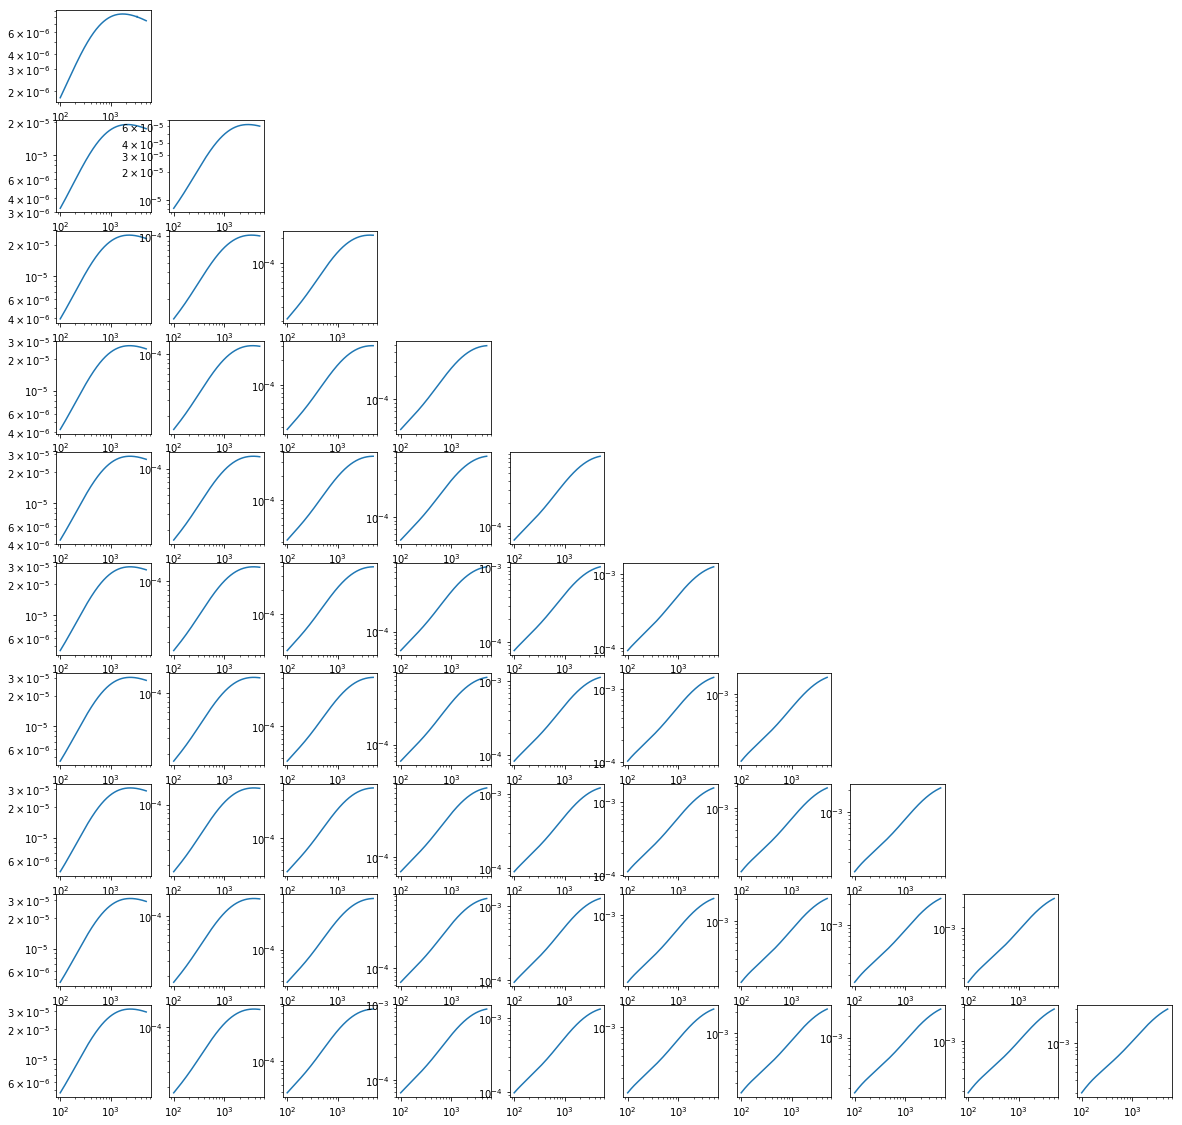

In [17]:
fig = plt.figure(figsize=(20,20))
counter = 0
for i in range(10):
        for j in range(0,i+1):
            ax = plt.subplot2grid((10,10), (i,j))
            ax.loglog(ells, ells*(ells+1)*Cls[counter])
            counter += 1

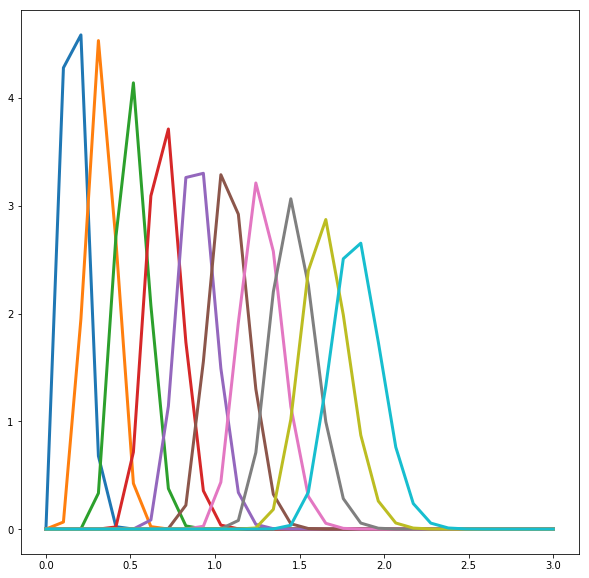

In [18]:
nz = 30
z = np.linspace(0.0,3.,nz)
plt.figure(figsize=(10,10))
for i in range(10):
    plt.plot(z, dNdzs[i,:], lw = 3)